<a href="https://colab.research.google.com/github/juandapalo2/Aprendizaje-Est-distico/blob/main/Taller_final_aprendizaje_est%C3%A1distico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aprendizaje estádistico
Juan David Padilla López

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml, load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_openml, load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import re
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from imblearn.over_sampling import SMOTE
import gzip as gz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
import gzip

with open('/content/accepted_2007_to_2016.csv.gz', 'rb') as f_in:
    with gzip.open('archivo_comprimido.gz', 'wb') as f_out:
        f_out.writelines(f_in)

In [ ]:
data= pd.read_csv('/content/accepted_2007_to_2016.csv.gz')
data

<ipython-input-3-a5b3c6a88b72>:1: DtypeWarning: Columns (18,46,54) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('/content/accepted_2007_to_2016.csv.gz')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321842,89885898,96279666.0,24000.0,24000.0,24000.0,60 months,12.79,543.50,C,C1,...,0.0,3.0,100.0,NaN,0.0,0.0,102517.0,104422.0,0.0,52017.0
1321843,88977788,95320713.0,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,...,0.0,0.0,75.9,42.9,0.0,1.0,227883.0,140118.0,27900.0,172283.0
1321844,88985880,95328703.0,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,7.0,0.0,75.7,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0
1321845,88224441,94525153.0,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,0.0,1.0,96.2,40.0,1.0,0.0,84664.0,62426.0,20700.0,58764.0


In [ ]:
data = pd.DataFrame(data, columns=['loan_amnt','installment', 'int_rate', 'term', 'grade', 'home_ownership', 'annual_inc', 'zip_code', 'total_pymnt'])

In [ ]:
data['term'] = data['term'].str.replace(r' months', '')
data['zip_code'] = data['zip_code'].str.replace(r'xx', '')

In [ ]:
def cambiar_datos(datos):
  if datos == 'A':
    return 4.0
  elif datos == 'B':
    return 3.0
  elif datos == 'C':
    return 2.0
  elif datos == 'D':
    return 1.0

data['grade']=data['grade'].apply(lambda x: cambiar_datos(x))

In [ ]:
def cambiar_datos(datos):
  if datos == 'RENT':
    return 0.0
  elif datos == 'MORTGAGE':
    return 1.0


data['home_ownership']=data['home_ownership'].apply(lambda x: cambiar_datos(x))

In [ ]:
data = data.fillna(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321847 entries, 0 to 1321846
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   loan_amnt       1321847 non-null  float64
 1   installment     1321847 non-null  float64
 2   int_rate        1321847 non-null  float64
 3   term            1321847 non-null  object 
 4   grade           1321847 non-null  float64
 5   home_ownership  1321847 non-null  float64
 6   annual_inc      1321847 non-null  float64
 7   zip_code        1321847 non-null  object 
 8   total_pymnt     1321847 non-null  float64
dtypes: float64(7), object(2)
memory usage: 90.8+ MB


In [ ]:
x = data.drop(['grade'], axis=1)
y = data['grade']
y=y.astype('int')
x=x.astype('int')

In [ ]:
x_train,x_test, y_train, y_test = x[:10000],x[10000:], y[:10000],y[10000:]

In [ ]:
data['loan_amnt'] = data['loan_amnt'].astype('float16')
data['installment'] = data['installment'].astype('float16')
data['int_rate'] = data['int_rate'].astype('float16')
data['grade'] = data['grade'].astype('float16')
data['home_ownership'] = data['home_ownership'].astype('float16')
data['annual_inc'] = data['annual_inc'].astype('float16')
data['total_pymnt'] = data['total_pymnt'].astype('float16')

# Verificar los cambios en los tipos de datos
print(data.dtypes)

loan_amnt         float16
installment       float16
int_rate          float16
term               object
grade             float16
home_ownership    float16
annual_inc        float16
zip_code           object
total_pymnt       float16
dtype: object


/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:170: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


##LDA

In [ ]:
lda= LinearDiscriminantAnalysis()
model = lda.fit(x_train,y_train)
pred= model.predict(x_test)


In [ ]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred,digits=3))

[[120799  14438    579      0     44]
 [ 34654 130620  31967    210     61]
 [     6  16371 249848 109931     78]
 [     0      0  18463 313173  54316]
 [     0      0      0    998 215291]]
              precision    recall  f1-score   support

           0      0.777     0.889     0.829    135860
           1      0.809     0.661     0.728    197512
           2      0.830     0.664     0.738    376234
           3      0.738     0.811     0.773    385952
           4      0.798     0.995     0.886    216289

    accuracy                          0.785   1311847
   macro avg      0.791     0.804     0.791   1311847
weighted avg      0.789     0.785     0.781   1311847



In [ ]:
Se observa que la mejor opción es la número 4, sonde nos da una precisión de 78.8 y un F1-Score de 88.6

##QDA

In [ ]:
qda=QuadraticDiscriminantAnalysis()
model2 = qda.fit(x_train,y_train)

In [ ]:
  pred2 = model2.predict(x_test)
print(np.unique(pred2,return_counts=True))

(array([0, 1, 2, 3, 4]), array([187648, 161753, 315737, 435984, 210725]))


In [ ]:
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2,digits=3))

[[123261  11986    569     35      9]
 [ 50269 120944  26043    236     20]
 [ 10897  28818 257207  79276     36]
 [  2642      5  31224 304568  47513]
 [   579      0    694  51869 163147]]
              precision    recall  f1-score   support

           0      0.657     0.907     0.762    135860
           1      0.748     0.612     0.673    197512
           2      0.815     0.684     0.743    376234
           3      0.699     0.789     0.741    385952
           4      0.774     0.754     0.764    216289

    accuracy                          0.739   1311847
   macro avg      0.738     0.749     0.737   1311847
weighted avg      0.747     0.739     0.738   1311847



##KNN

In [ ]:
x_train_array = x_train.to_numpy()
y_train_array = y_train.to_numpy()

sample_size = 1000
random_indices = np.random.choice(len(x_train_array), size=sample_size, replace=False)
x_train_sample = x_train_array[random_indices]
y_train_sample = y_train_array[random_indices]

k=300
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_sample, y_train_sample)

KNeighborsClassifier(n_neighbors=300)

In [ ]:
yhat = knn.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:
print(confusion_matrix(y_test,yhat))
print(classification_report(y_test,yhat,digits=3))

[[     0      0      0  49972  85888]
 [     0      0      0  63561 133951]
 [     0      0      0  99253 276981]
 [     0      0      0  82827 303125]
 [     0      0      0  36871 179418]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.000     0.000     0.000    135860
           1      0.000     0.000     0.000    197512
           2      0.000     0.000     0.000    376234
           3      0.249     0.215     0.231    385952
           4      0.183     0.830     0.300    216289

    accuracy                          0.200   1311847
   macro avg      0.086     0.209     0.106   1311847
weighted avg      0.103     0.200     0.117   1311847



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Arboles

In [ ]:
tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred= tree_clf.predict(x_test)

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print('confusion Metric \n', confusion_mat)
print('classification report\n', class_report)

confusion Metric 
 [[123762  11546    541      0     11]
 [ 49920 121606  25772    189     25]
 [   438  26956 254912  93883     45]
 [     0      0  22643 315037  48272]
 [     0      0    935   1229 214125]]
classification report
               precision    recall  f1-score   support

           0       0.71      0.91      0.80    135860
           1       0.76      0.62      0.68    197512
           2       0.84      0.68      0.75    376234
           3       0.77      0.82      0.79    385952
           4       0.82      0.99      0.89    216289

    accuracy                           0.78   1311847
   macro avg       0.78      0.80      0.78   1311847
weighted avg       0.79      0.78      0.78   1311847



## Random Forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1500, random_state=0, max_features='sqrt')
%time rf_clf.fit(x_train,y_train)
%time y_train_pred_rf=cross_val_predict(rf_clf,x_train,y_train,cv=5)

CPU times: user 19.7 s, sys: 53.6 ms, total: 19.7 s
Wall time: 19.8 s
CPU times: user 1min 22s, sys: 36.1 ms, total: 1min 22s
Wall time: 1min 22s


In [ ]:
rf_conf = confusion_matrix(y_train, y_train_pred_rf)
rf_conf

array([[ 966,  111,    0,    0,    0],
       [  85, 1004,  131,    0,    0],
       [   0,   22, 1678,  124,    1],
       [   0,    0,    6, 3106,    1],
       [   0,    0,    0,    0, 2765]])

In [ ]:
precision_score(y_train,y_train_pred_rf, average='weighted'),recall_score(y_train,y_train_pred_rf, average='weighted'),f1_score(y_train,y_train_pred_rf, average='weighted')

(0.9510926623236812, 0.9519, 0.951247617790094)

##Busqueda de hiperparametros con metodo de Random

In [ ]:
estimator = RandomForestClassifier()

In [ ]:
param_dist = {
    "n_estimators": randint(100, 1000),
    "max_depth": [3, 5, None],
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
    "bootstrap": [True, False]
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    n_jobs=1,
    verbose=3,
    random_state=42
)

In [ ]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=171;, score=0.722 total time=   0.8s
[CV 2/3] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=171;, score=0.749 total time=   0.8s
[CV 3/3] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=171;, score=0.675 total time=   0.8s
[CV 1/3] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=566;, score=0.735 total time=   2.5s
[CV 2/3] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=566;, score=0.731 total time=   3.2s
[CV 3/3] END bootstrap=True, max_depth=3, min_samples_leaf=3, min_samples_split=3, n_estimators=566;, score=0.734 total time=   3.1s
[CV 1/3] END bootstrap=True, max_depth=None, min_samples_leaf=3, min_samples_split=9, n_estimators=472;, score=0.980 total time=   3.9s
[CV 2

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fce997dd810>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fce997dc7c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fce997dc820>},
                   random_state=42, scoring='accuracy', verbose=3)

In [ ]:
best_params = random_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)

Mejores hiperparámetros encontrados: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 472}


In [ ]:
best_model = random_search.best_estimator_
print("Mejor modelo encontrado:", best_model)

Mejor modelo encontrado: RandomForestClassifier(min_samples_leaf=3, min_samples_split=9,
                       n_estimators=472)


In [ ]:
y_pred = best_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.770     0.855     0.810    135860
           1      0.783     0.664     0.718    197512
           2      0.831     0.661     0.737    376234
           3      0.741     0.827     0.782    385952
           4      0.817     0.994     0.897    216289

    accuracy                          0.786   1311847
   macro avg      0.788     0.800     0.789   1311847
weighted avg      0.789     0.786     0.781   1311847



En este caso al utilizar random forest en la busqueda de hbiperparametros nos da un resultado mas favorable por lo que este sería el mejor metodo a utilizar

## Estudio de interpretabilidad

In [ ]:
importances = rf_clf.feature_importances_

In [ ]:
sorted_indices = np.argsort(importances)[::-1]
feature_names = x_train.columns
top_10_indices = sorted_indices[:10]
top_10_features = [feature_names[idx] for idx in top_10_indices]
top_20_indices = sorted_indices[:20]
top_20_features = [feature_names[idx] for idx in top_20_indices]

In [ ]:
print("Las 8 variables más importantes:")
for feature in top_10_features:
    print(feature)

Las 8 variables más importantes:
int_rate
installment
loan_amnt
total_pymnt
term
annual_inc
zip_code
home_ownership


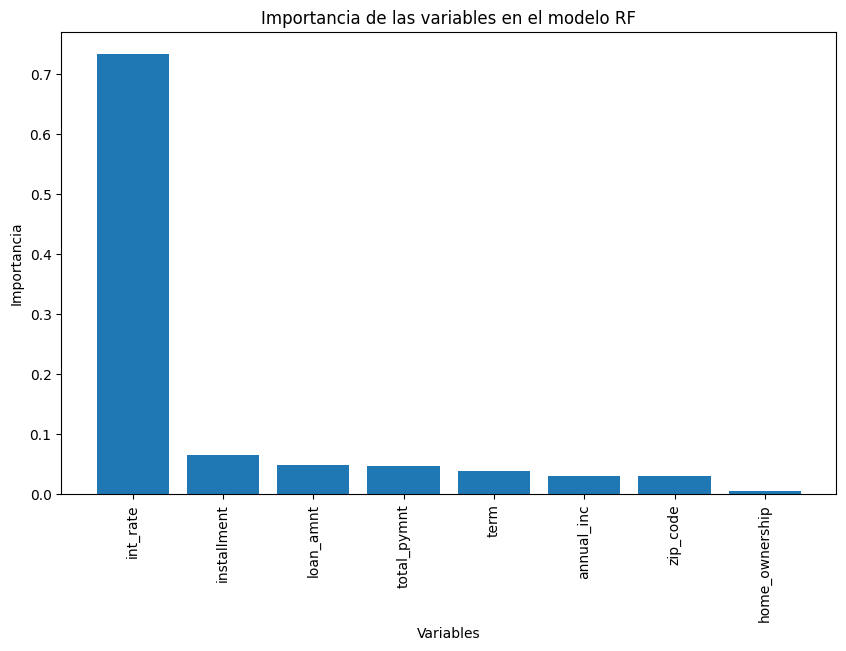

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), [feature_names[idx] for idx in sorted_indices], rotation=90)
plt.xlabel("Variables")
plt.ylabel("Importancia")
plt.title("Importancia de las variables en el modelo RF")
plt.show()

La variable más importante es la de la tasa de interes (int_rate), lo que demuestra que esta se puede ver afectvada por el historial crediticio de la persona.

## entrenar un modelo RF

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=0, max_features='sqrt')
%time rf_clf.fit(x_train,y_train)
%time y_train_pred_rf=cross_val_predict(rf_clf,x_train,y_train,cv=5)

CPU times: user 18 s, sys: 53.4 ms, total: 18.1 s
Wall time: 18.4 s
CPU times: user 54.5 s, sys: 105 ms, total: 54.6 s
Wall time: 54.9 s


In [ ]:
precision_score(y_train,y_train_pred_rf, average='weighted'),recall_score(y_train,y_train_pred_rf, average='weighted'),f1_score(y_train,y_train_pred_rf, average='weighted')

(0.9514043274682678, 0.9522, 0.9515493083678697)

El modelo mejora ya que al utilizar SMOTE estamos haciendo un rebalanceo de las variables lo que hace que aumente la precisión